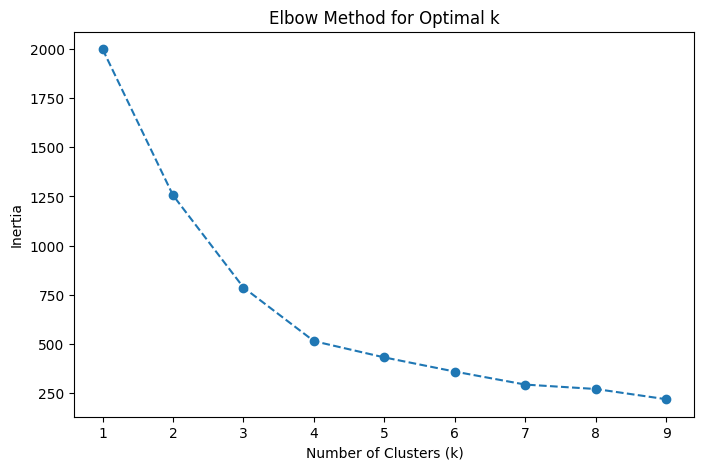

         PurchaseAmount  PurchaseFrequency
Cluster                                   
0           3352.549153           2.688136
1           1083.013928           6.214485
2           3461.664740           8.699422


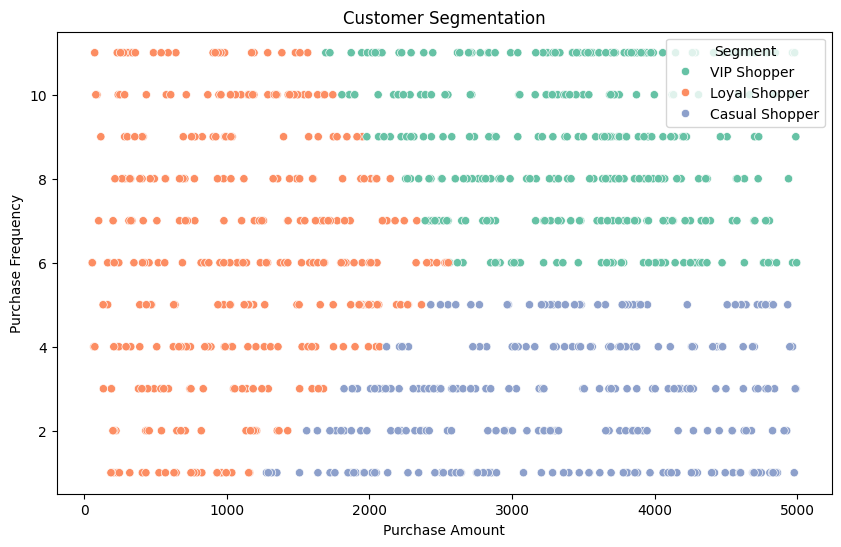

   CustomerID        Segment
0           1    VIP Shopper
1           2  Loyal Shopper
2           3    VIP Shopper
3           4  Loyal Shopper
4           5  Loyal Shopper


In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dummy dataset
data = pd.read_csv("data/customer_segmentation.csv")

# Select relevant features for segmentation
purchase_data = data[['PurchaseAmount', 'PurchaseFrequency']]

# Scale the data to standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(purchase_data)

# Determine the optimal number of clusters using the Elbow method
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# From the plot, choose the optimal k (e.g., k=3)
optimal_k = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Analyze the clusters
cluster_summary = data.groupby('Cluster')[['PurchaseAmount', 'PurchaseFrequency']].mean()
print(cluster_summary)
cluster_summary.to_csv("purchase_cluster_summary.csv", index=True)


# Assign categories to clusters based on behavior
cluster_mapping = {
    0: 'Casual Shopper',
    1: 'Loyal Shopper',
    2: 'VIP Shopper'  # Adjust based on cluster_summary
}
data['Segment'] = data['Cluster'].map(cluster_mapping)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PurchaseAmount',
    y='PurchaseFrequency',
    hue='Segment',
    palette='Set2',
    data=data
)
plt.title('Customer Segmentation')
plt.xlabel('Purchase Amount')
plt.ylabel('Purchase Frequency')
plt.legend(title='Segment')
plt.show()

# Save the segmented data for further use
data.to_csv("segmented_customers.csv", index=False)

# Print the first few rows of the segmented dataset
print(data[['CustomerID', 'Segment']].head())


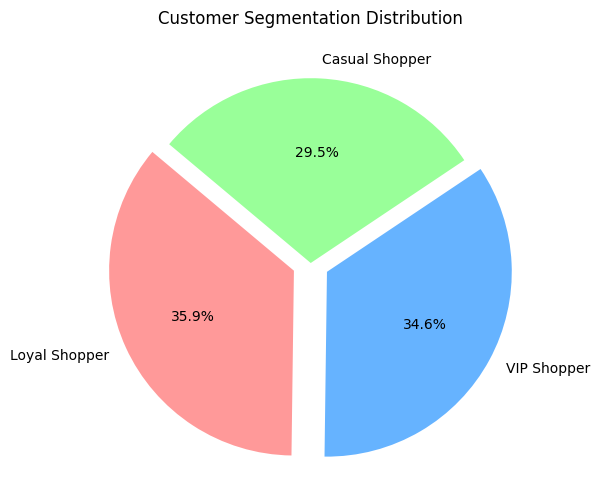

In [2]:
# Calculate the count of each segment
segment_counts = data['Segment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
segment_counts.plot.pie(
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['#ff9999','#66b3ff','#99ff99'], 
    labels=segment_counts.index,
    explode=(0.1, 0.1, 0)  # Exploding slices for better visibility
)
plt.title('Customer Segmentation Distribution')
plt.ylabel('')  # Hide y-axis label for better aesthetics
plt.savefig('shoppers.png')
plt.show()


<Figure size 1000x600 with 0 Axes>

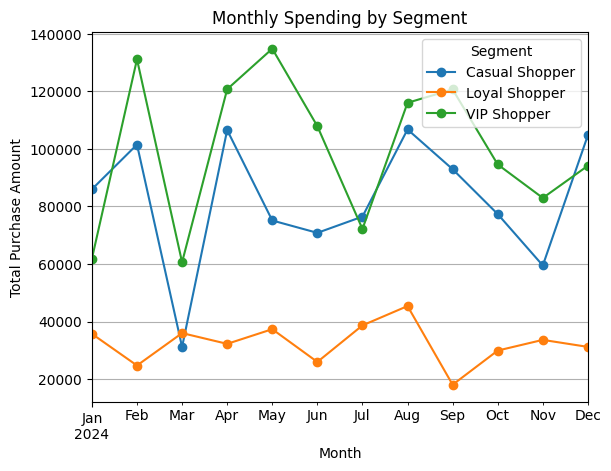

In [3]:
# Ensure you have a 'Date' column and convert it to datetime
# (Replace 'Date' with the actual date column in your dataset)
data['Date'] = pd.to_datetime(data['Date'])

# Extract the month from the date
data['Month'] = data['Date'].dt.to_period('M')

# Calculate monthly purchase amounts per segment
monthly_trends = data.groupby(['Month', 'Segment'])['PurchaseAmount'].sum().reset_index()

# Pivot the data for plotting
monthly_trends_pivot = monthly_trends.pivot(index='Month', columns='Segment', values='PurchaseAmount')

# Plot the line chart
plt.figure(figsize=(10, 6))
monthly_trends_pivot.plot(kind='line', marker='o')
plt.title('Monthly Spending by Segment')
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount')
plt.legend(title='Segment')
plt.grid()
plt.savefig('monthly_purchase.png')
plt.show()


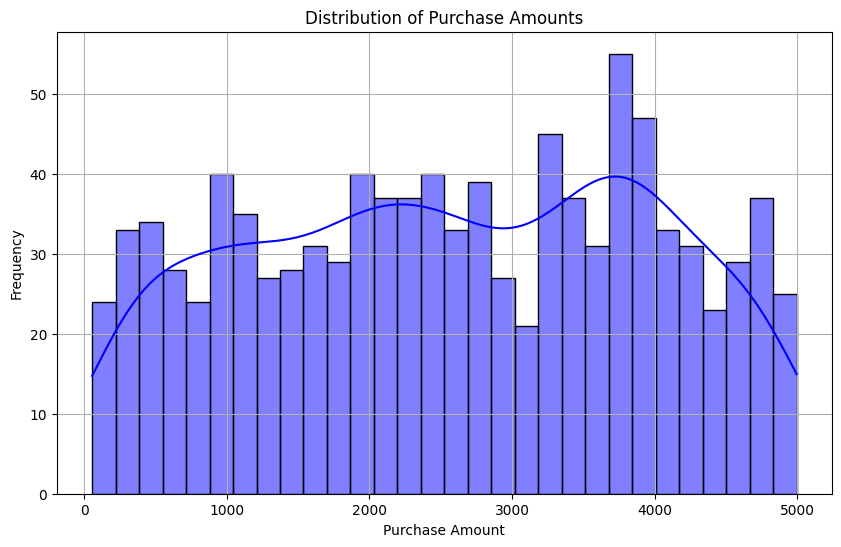

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data['PurchaseAmount'], kde=True, bins=30, color='blue')
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.grid()
plt.show()


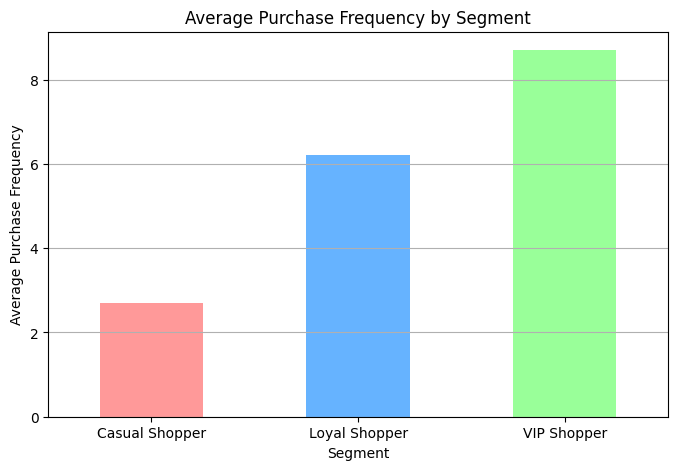

In [5]:
segment_avg_freq = data.groupby('Segment')['PurchaseFrequency'].mean()

plt.figure(figsize=(8, 5))
segment_avg_freq.plot(kind='bar', color=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Average Purchase Frequency by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Purchase Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [6]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'jupyterlab'



# Pie chart for customer segments
fig = px.pie(data, names='Segment', title='Customer Segmentation Distribution',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


In [7]:
# Filtered Pie Chart by State
filtered_data = data[data['State'] == 'Lagos']  # Example filter
fig = px.pie(filtered_data, names='Segment', title='Customer Segmentation in Lagos',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


In [8]:
# Filtered Pie Chart by State
filtered_data = data[data['State'] == 'Lagos']  # Example filter
fig = px.pie(filtered_data, names='Segment', title='Customer Segmentation in Lagos',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


In [9]:
# Filtered Pie Chart by State
filtered_data = data[data['State'] == 'Abuja']  # Example filter
fig = px.pie(filtered_data, names='Segment', title='Customer Segmentation in Abuja',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [10]:
data.head()

,CustomerID,Age,Gender,PurchaseAmount,PurchaseFrequency,WebsiteVisits,TimeOnSite,BounceRate,State,Date,Cluster,Segment,Month
0,1,56,Female,3607,11,6,11.28,53.33,Borno,2024-04-12,2,VIP Shopper,2024-04
1,2,69,Male,695,9,19,12.50,40.56,Osun,2024-12-14,1,Loyal Shopper,2024-12
2,3,46,Male,3040,9,38,5.19,16.92,Edo,2024-09-27,2,VIP Shopper,2024-09
3,4,32,Male,1949,6,28,12.89,97.75,Delta,2024-04-16,1,Loyal Shopper,2024-04
4,5,60,Male,2554,6,2,11.86,85.33,Delta,2024-03-12,1,Loyal Shopper,2024-03


In [11]:
# Rename the column "Segment" to "PurchasingSegment"
data.rename(columns={'Segment': 'PurchasingSegment'}, inplace=True)

# Save the updated DataFrame to a CSV file
data.to_csv('purchasing_segment_data.csv', index=False)

print("The column has been renamed and the data saved as 'purchasing_segment_data.csv'")


The column has been renamed and the data saved as 'purchasing_segment_data.csv'
